In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Para el bulbo tomaremos a la velocidad circular de la siguiente forma $$\begin{equation}
\frac{V_{c}^{2}}{G\rho_{b,0}r_{b}^{2}C} = y^{2-\alpha_{b}}  \int^{1}_{0} dx \frac{x^{2-\alpha_{b}}exp(x^{2}y^{2})}{\sqrt{1-x^{2}e^{2}}}
\end{equation}$$

donde $$\begin{equation}
C = 4\pi \sqrt{1-e^{2}} (\frac{r_{b}}{a_{b}})^{-\alpha_{b}}
\end{equation}$$
y $$\begin{equation}
e = \sqrt{1-q_{b}^2}
\end{equation}$$
y haciendo
$$\begin{equation}
U = G\rho_{b,0}r_{b^{2}}
\end{equation}$$
donde de la tabla 2.3 sabemos que $\rho_{b,0}$ toma el valor 0.427 para el modelo I

In [13]:
G = 4.302e-3
r_b2 = 3.61e6
U_b = G*r_b2
q_b = 0.6
r_b = 1.9e03
a_b = 1.0e03
alpha_b = 1.8
C_b = 4.*np.pi*q_b*(r_b/a_b)**(-alpha_b)
print C_b

2.37467747459


In [7]:
def I_b(x,y,q_b=0.6,alpha_b=1.8):
    e = np.sqrt(1.-q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-x**2. * y**2.)
    d = np.sqrt(1.-x**2. * e**2.)
    return y**(2.-alpha_b)*n/d

In [9]:
y = np.linspace(0.,15.,100)
r = np.linspace(0.,15.,100)

In [10]:
def Vc_ad_b(l):
    Integral_b = []
    for i in range (0,len(l)):
        result = integrate.quad(I_b,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.sqrt(Integral_b)

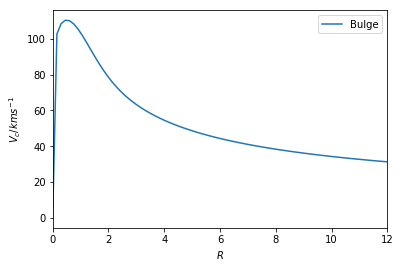

In [14]:
plt.plot(r,np.sqrt(C_b*U_b*0.427)*Vc_ad_b(y),label='Bulge')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

Para calcular la velocidad circular de halo de materia oscura volvemos a utiliar la expresión (2.132) del libro Galactic Dynamics, Binney & Tremaine
$$\begin{equation}
v_{c}^{2} (R) = 4\pi G\sqrt{1-e^{2}} \int_{0}^{R} dm \frac{m^{2} \rho (m^{2})}{\sqrt{R^{2} - m^{2}e^{2}}}
\end{equation}$$

$$\begin{equation}
\frac{v_{c}^{2}}{4\pi U\sqrt{1-e^{2}}} = y^{2-\alpha_{h}}\int_{0}^{1} \frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}} (1-xy)^{\alpha_{h}-\beta_{h}}
\end{equation}$$
donde $U = G\rho_{h,0}a_{h}^{2}$

In [15]:
U_h = G*0.711*3.83e03**2.
C_h = 4.*np.pi*0.8

In [25]:
def I_h(x,y,q_h=0.8,alpha_h=-2.,a_h=3.83e03,beta_h=2.96):
    n = x**(2.-alpha_h)*(1.+x*y)**(alpha_h-beta_h)
    d = np.sqrt(1.-x**2. * (1.-q_h**2.))
    return (n*y**(2.-alpha_h))/d

In [26]:
y = np.linspace(0.,15.,100)
r = np.linspace(0.,15.,100)

In [27]:
def Vc_b(l):
    Integral_h = []
    for i in range (0,len(l)):
        result = integrate.quad(I_h,0,1,args=(l[i]))[0]
        Integral_h.append(result)
    return np.sqrt(Integral_h)

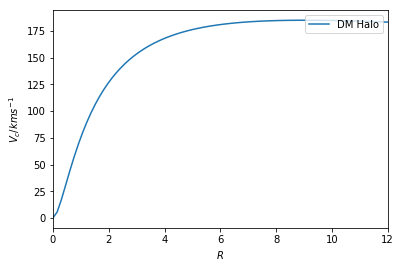

In [30]:
plt.plot(r,np.sqrt(C_h*U_h)*Vc_b(y),label='DM Halo')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

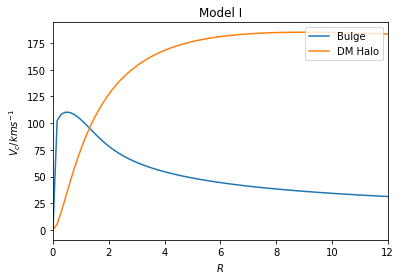

In [34]:
plt.plot(r,np.sqrt(C_b*U_b*0.427)*Vc_ad_b(y),label='Bulge')
plt.plot(r,np.sqrt(C_h*U_h)*Vc_b(y),label='DM Halo')
#plt.plot(r,Vc_tot(y),label='Total')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Model I')
plt.show()

In [32]:
def Vc_tot(l):
    suma = (np.sqrt(C_b*U_b*0.427)*Vc_ad_b(l))**2. + (np.sqrt(C_h*U_h)*Vc_b(l))**2.
    return suma